In [1]:
import time
start_time=time.time()

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import pickle
import itertools
import shutil

import statsmodels.api as sm
from scipy import interpolate

In [3]:
reg=['604','595']
inst=['I','T']
lin=['H','N','O','S']
sam=['A','B','C']
ms=['H','V']

In [4]:
n=7
pc=4.16
tl="24"

In [5]:
plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]=tl

In [6]:
rg='604\\'
r=0
i=1
l=2
s=1
m=0

datat=reg[r]+inst[i]+lin[l]+sam[s]+ms[m]
datat

'604TOBH'

In [7]:
#xx

In [8]:
#folder=reg[r]+'//'+inst[i]+'//'+lin[l]+'//'+sam[s]+'//'+ms[m]
#folder

In [9]:
os.mkdir(rg+datat)

Structure Function

In [10]:
xi=5
xf=17

In [11]:
pickle_in = open('Datos\\'+datat+'//'+'S.pkl',"rb")
SF = pickle.load(pickle_in)
datax=SF

In [12]:
SFData=dict()
SFD=dict()



for i in range(n):
    al=np.log10(datax[i].Lag)
    bl=np.log10(datax[i].Nmqvd)
    cl=np.log10(datax[i].ErrY)
    x,y,z=np.array(al[xi:xf]),np.array(bl[xi:xf]),np.array(cl[xi:xf])
    x = sm.add_constant(x)
    #model = sm.OLS(y, x)
    model = sm.WLS(y, x,weights=1./(z**2))
    SFData[i] = model.fit()
    SFD[i]=[SFData[i].params[1],SFData[i].bse[1],SFData[i].params[0],SFData[i].bse[0],
         SFData[i].rsquared,datax[i].Lag[xi],datax[i].Lag[xf]]
    #SFD[i]=pd.DataFrame(XX).T

SFD=pd.DataFrame(SFD).T
SFD.rename(columns={0:'A',1:'DA',2:'B',3:'DB',4:'C',5:'E',6:'F'}, inplace=True)
SFD.loc['Promedio'] = SFD.mean()
SFD

,A,DA,B,DB,C,E,F
0,0.323427,0.014171,1.482107,0.017110,0.981163,9.0,27.0
1,0.331091,0.015323,1.472784,0.018476,0.979031,9.0,27.0
2,0.326490,0.016950,1.473197,0.020412,0.973754,9.0,27.0
3,0.326600,0.016980,1.473043,0.020448,0.973681,9.0,27.0
4,0.352317,0.018319,1.441980,0.022049,0.973676,9.0,27.0
5,0.361257,0.019177,1.430347,0.023078,0.972592,9.0,27.0
6,0.334402,0.020985,1.453103,0.025306,0.962110,9.0,27.0
Promedio,0.336512,0.017415,1.460937,0.020983,0.973715,9.0,27.0


In [13]:
SFD=SFD.round(decimals=3)
SFDx=(SFD.groupby(SFD.columns.str[-1], axis=1).apply(lambda x: x.astype(str).apply('$\pm$'.join, 1)))
SFres=SFDx[['A','B','C']].copy()

In [14]:
SFres=SFres.assign(D=SFD.E*pc)
SFres=SFres.assign(E=SFD.F*pc)

In [15]:
SFres.rename(columns={'A':'$\\alpha$','B':'$\epsilon$','C':'R','D':'L$_{0}$ [pc]','E':'L$_{F}$ [pc]'}, inplace=True)

In [16]:
SFres=SFres.round(decimals=3)
SFres

,$\alpha$,$\epsilon$,R,L$_{0}$ [pc],L$_{F}$ [pc]
0,0.323$\pm$0.014,1.482$\pm$0.017,0.981,37.44,112.32
1,0.331$\pm$0.015,1.473$\pm$0.018,0.979,37.44,112.32
2,0.326$\pm$0.017,1.473$\pm$0.02,0.974,37.44,112.32
3,0.327$\pm$0.017,1.473$\pm$0.02,0.974,37.44,112.32
4,0.352$\pm$0.018,1.442$\pm$0.022,0.974,37.44,112.32
5,0.361$\pm$0.019,1.43$\pm$0.023,0.973,37.44,112.32
6,0.334$\pm$0.021,1.453$\pm$0.025,0.962,37.44,112.32
Promedio,0.337$\pm$0.017,1.461$\pm$0.021,0.974,37.44,112.32


In [17]:
SFres.to_latex(rg+datat+'//'+'a.tex', escape=False, caption=datat+'a')

In [18]:
SFdisc = SFD[['A','DA']].copy()

In [19]:
exp1=2/3
SFdisc=SFdisc.assign(B=((SFD.A-exp1)/exp1)*100)

exp2=5/3
SFdisc=SFdisc.assign(C=((SFD.A-exp2)/exp2)*100)

In [20]:
#SFdisc

In [21]:
#print(SFData[0].summary())

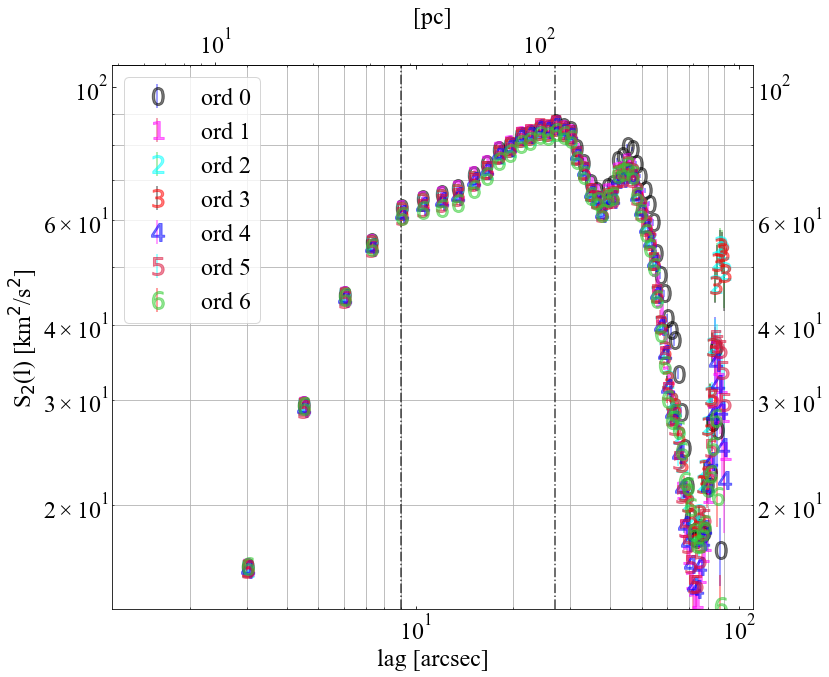

In [22]:

#dt=SFPr

yi=xi
yf=xf

marker=itertools.cycle((r"$0$",r"$1$",r"$2$",r"$3$",r"$4$",r"$5$",r"$6$"))
color=itertools.cycle(("black","blue","magenta","crimson","cyan","limegreen","red"))

#marker=itertools.cycle(('o','^','s','h','*','p','v'))
#color=itertools.cycle(('b','y','r','c','m','k','g'))

mx=datax[0].iloc[:,1].max()*1.25
mn=datax[0].iloc[1,1]*0.85

fig, ax=plt.subplots(figsize=(11.5,10))

for i in range(n):
    ax.errorbar(datax[i].iloc[:,0],datax[i].iloc[:,1], yerr=datax[i].iloc[:,2],  
                marker=next(marker), fmt=' ',color=next(color), ecolor=next(color), alpha=0.5, markersize=18, label='ord ' + str(i))
    
#for i in range(n):
#    ax.errorbar(dt[i][0],dt[i][1],  fmt='-',color=next(color))

ax.set(xscale='log',yscale='log')
ax.set(xlabel='lag [arcsec]', ylabel='S$_{2}$(l) [km$^{2}$/s$^{2}$]')
#plt.title('Función de estructura, $S_{2}(l)$')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='best')
#ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.grid(which='minor')
plt.ylim(mn,mx)
#########################################################
plt.axvline(x=datax[0].iloc[xi,0], color='k', linestyle='-.', alpha=0.75)
plt.axvline(x=datax[0].iloc[xf,0], color='k', linestyle='-.', alpha=0.75)

def forward(x):
    return pc*x


def inverse(x):
    return pc*x

secax = ax.secondary_xaxis('top', functions=(forward, inverse))
secax.set_xlabel('[pc]')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]=tl
fig.savefig(rg+datat+'//'+'S.pdf')

Structure Function Norm

In [23]:
pickle_in = open('Datos\\'+datat+'//'+'SN.pkl',"rb")
SFN = pickle.load(pickle_in)
datax=SFN

In [24]:
SFNData=dict()


for i in range(n):
    x=SFN[i]['Lag']*pc
    y=SFN[i]['Nmqvd']-2
    tck=interpolate.splrep(x,y,s=0)
    grid=np.linspace(x.min(),x.max(),num=len(x))
    ynew=interpolate.splev(grid,tck,der=0)

    inter=pd.DataFrame([grid,ynew]).T
    SFNData[i]=interpolate.sproot(tck)

In [25]:
SFND=pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in SFNData.items() ])).T
SFND.rename(columns={0:'1',1:'2',2:'3',3:'4',4:'5',5:'6',6:'7',7:'8',8:'9',9:'10'}, inplace=True)
SFND=SFND.round(decimals=0)

SFND

,1,2,3,4
0,60.0,142.0,170.0,208.0
1,58.0,143.0,171.0,200.0
2,58.0,142.0,170.0,199.0
3,58.0,142.0,170.0,199.0
4,59.0,142.0,171.0,197.0
5,59.0,143.0,171.0,198.0
6,60.0,143.0,169.0,199.0


https://stackoverflow.com/questions/19736080/creating-dataframe-from-a-dictionary-where-entries-have-different-lengths

In [26]:
SFND.to_latex(rg+datat+'//'+'b.tex', escape=False, caption=datat+'b')

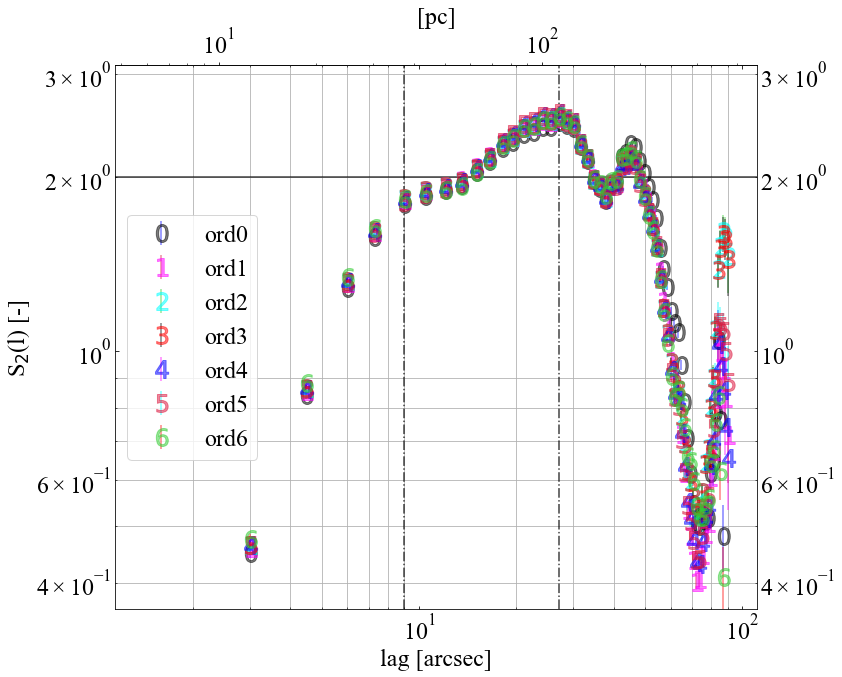

In [27]:
#dt=SFNPr

yi=xi
yf=xf

marker=itertools.cycle((r"$0$",r"$1$",r"$2$",r"$3$",r"$4$",r"$5$",r"$6$"))
color=itertools.cycle(("black","blue","magenta","crimson","cyan","limegreen","red"))

mx=datax[0].iloc[:,1].max()*1.25
mn=datax[0].iloc[1,1]*0.8

fig, ax=plt.subplots(figsize=(11.5,10))

for i in range(n):
    ax.errorbar(datax[i].iloc[:,0],datax[i].iloc[:,1], yerr=datax[i].iloc[:,2],  
                marker=next(marker), fmt=' ',color=next(color), ecolor=next(color), alpha=0.5, markersize=18, label='ord' + str(i))

#for i in range(n):
#    ax.errorbar(dt[i][0],dt[i][1],  fmt='-',color=next(color))

ax.set(xscale='log',yscale='log')
ax.set(xlabel='lag [arcsec]', ylabel='S$_{2}$(l) [-]')
#plt.title('Función de estructura, $S_{2}(l)$')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='best')
#ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.grid(which='minor')
plt.ylim(mn,mx)
#########################################################
plt.axvline(x=datax[0].iloc[xi,0], color='k', linestyle='-.', alpha=0.75)
plt.axvline(x=datax[0].iloc[xf,0], color='k', linestyle='-.', alpha=0.75)
plt.axhline(y=2, color='k', linestyle='-', alpha=0.75)


def forward(x):
    return pc*x


def inverse(x):
    return pc*x

secax = ax.secondary_xaxis('top', functions=(forward, inverse))
secax.set_xlabel('[pc]')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]=tl

fig.savefig(rg+datat+'//'+'SN.pdf')

Structure Function WH

In [28]:
xi=140
xf=350

In [29]:
pickle_in = open('Datos\\'+datat+'//'+'SH.pkl',"rb")
SFH = pickle.load(pickle_in)
datax=SFH

In [30]:
SFHData=dict()
SFHD=dict()

for i in range(n):
    al=np.log10(datax[i].Lag)
    bl=np.log10(datax[i].Nmqvd)
    cl=np.log10(datax[i].ErrY)
    x,y,z=np.array(al[xi:xf]),np.array(bl[xi:xf]),np.array(cl[xi:xf])
    x = sm.add_constant(x)
    #model = sm.OLS(y, x)
    model = sm.WLS(y, x,weights=1./(z**2))
    SFHData[i] = model.fit()
    SFHD[i]=[SFHData[i].params[1],SFHData[i].bse[1],SFHData[i].params[0],SFHData[i].bse[0],
         SFHData[i].rsquared,datax[i].Lag[xi],datax[i].Lag[xf]]
    #SFD[i]=pd.DataFrame(XX).T

SFHD=pd.DataFrame(SFHD).T
SFHD.rename(columns={0:'A',1:'DA',2:'B',3:'DB',4:'C',5:'E',6:'F'}, inplace=True)
SFHD.loc['Promedio'] = SFHD.mean()
SFHD

,A,DA,B,DB,C,E,F
0,0.500594,0.027287,1.302344,0.033058,0.618035,11.787847,23.314969
1,0.444749,0.026741,1.349137,0.032419,0.570801,11.787847,23.314969
2,0.523623,0.026594,1.260462,0.032199,0.650809,11.787847,23.314969
3,0.523780,0.026589,1.260183,0.032192,0.651040,11.787847,23.314969
4,0.537334,0.026969,1.246047,0.032651,0.656178,11.787847,23.314969
5,0.533481,0.027028,1.248504,0.032722,0.651930,11.787847,23.314969
6,0.533506,0.026561,1.240659,0.032156,0.659833,11.787847,23.314969
Promedio,0.513867,0.026824,1.272477,0.032485,0.636947,11.787847,23.314969


In [31]:
SFdisc=SFdisc.assign(D=((SFHD.A-SFD.A)/SFD.A)*100)
SFdisc.loc['Promedio'] = SFdisc.mean()

In [32]:
SFdisc

,A,DA,B,C,D
0,0.323000,0.01400,-51.55000,-80.6200,54.982804
1,0.331000,0.01500,-50.35000,-80.1400,34.365306
2,0.326000,0.01700,-51.10000,-80.4400,60.620531
3,0.327000,0.01700,-50.95000,-80.3800,60.177332
4,0.352000,0.01800,-47.20000,-78.8800,52.651841
5,0.361000,0.01900,-45.85000,-78.3400,47.778665
6,0.334000,0.02100,-49.90000,-79.9600,59.732359
Promedio,0.336375,0.01725,-49.54375,-79.8175,52.848948


In [33]:
SFdisc=SFdisc.round(decimals=3)
SFdiscx=(SFdisc.groupby(SFdisc.columns.str[-1], axis=1).apply(lambda x: x.astype(str).apply('$\pm$'.join, 1)))
SFdis=SFdiscx[['A','B','C','D']].copy()
SFdis.rename(columns={'A':'$\\alpha$','B':'2/3','C':'5/3','D':'SF$_{WH}$'}, inplace=True)

In [34]:
SFdis

,$\alpha$,2/3,5/3,SF$_{WH}$
0,0.323$\pm$0.014,-51.55,-80.62,54.983
1,0.331$\pm$0.015,-50.35,-80.14,34.365
2,0.326$\pm$0.017,-51.1,-80.44,60.621
3,0.327$\pm$0.017,-50.95,-80.38,60.177
4,0.352$\pm$0.018,-47.2,-78.88,52.652
5,0.361$\pm$0.019,-45.85,-78.34,47.779
6,0.334$\pm$0.021,-49.9,-79.96,59.732
Promedio,0.336$\pm$0.017,-49.544,-79.818,52.849


In [35]:
SFdis.to_latex(rg+datat+'//'+'c.tex', escape=False, caption=datat+'c')

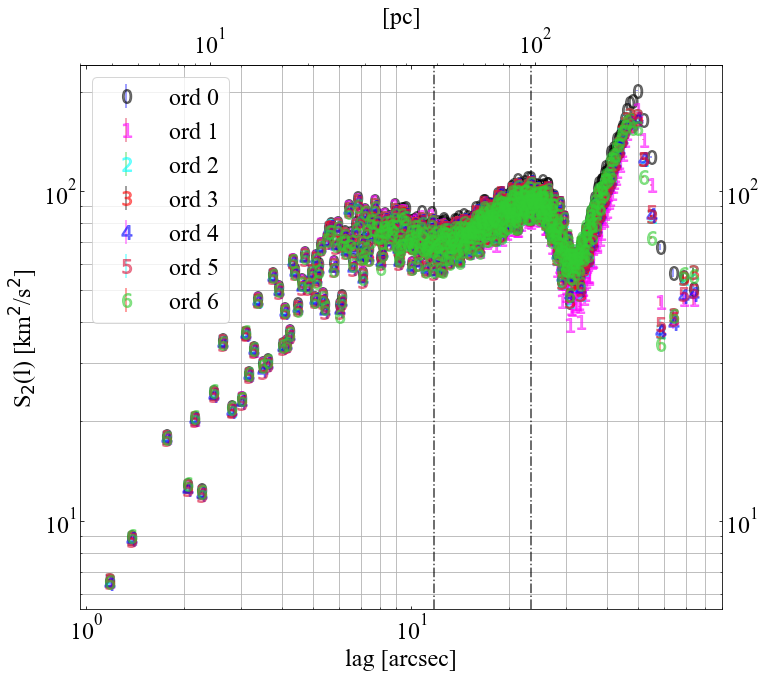

In [36]:
#dt=SFwh1Pr

marker=itertools.cycle((r"$0$",r"$1$",r"$2$",r"$3$",r"$4$",r"$5$",r"$6$"))
color=itertools.cycle(("black","blue","magenta","crimson","cyan","limegreen","red"))

mx=datax[0].iloc[:,1].max()*1.25
mn=datax[0].iloc[1,1]*0.6

fig, ax=plt.subplots(figsize=(11.5,10))

for i in range(n):
    ax.errorbar(datax[i].iloc[:,0],datax[i].iloc[:,1], yerr=datax[i].iloc[:,2],  
                marker=next(marker), fmt=' ',color=next(color), ecolor=next(color), alpha=0.5, markersize=14, label='ord ' + str(i))

#for i in range(n):
#    ax.errorbar(dt[i][0],dt[i][1],  fmt='-',color=next(color))

ax.set(xscale='log',yscale='log')
ax.set(xlabel='lag [arcsec]', ylabel='S$_{2}$(l) [km$^{2}$/s$^{2}$]')
#plt.title('Función de estructura, $S_{2}(l)$')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='best')
#ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.grid(which='minor')
#plt.ylim(mn,mx)
#########################################################
plt.axvline(x=datax[0].iloc[xi,0], color='k', linestyle='-.', alpha=0.75)
plt.axvline(x=datax[0].iloc[xf,0], color='k', linestyle='-.', alpha=0.75)

def forward(x):
    return pc*x


def inverse(x):
    return pc*x

secax = ax.secondary_xaxis('top', functions=(forward, inverse))
secax.set_xlabel('[pc]')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]=tl

fig.savefig(rg+datat+'//'+'SWH.pdf')

Auto correlation Function

In [37]:
pickle_in = open('Datos\\'+datat+'//'+'AF.pkl',"rb")
AF = pickle.load(pickle_in)

In [38]:
AFData=dict()

for i in range(n):
    x=AF[i]['Lag']*pc
    y=AF[i]['Nmqvd']
    tck=interpolate.splrep(x,y,s=0)
    grid=np.linspace(x.min(),x.max(),num=len(x))
    ynew=interpolate.splev(grid,tck,der=0)

    inter=pd.DataFrame([grid,ynew]).T
    AFData[i]=interpolate.sproot(tck)

In [39]:
AFD=pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in AFData.items() ])).T
AFD.rename(columns={0:'1',1:'2',2:'3',3:'4',4:'5',5:'6',6:'7',7:'8',8:'9',9:'10'}, inplace=True)
AFD=AFD.round(decimals=0)
AFD

,1,2,3,4,5,6,7
0,76.0,144.0,148.0,151.0,157.0,241.0,NaN
1,75.0,238.0,NaN,NaN,NaN,NaN,NaN
2,78.0,142.0,149.0,153.0,155.0,238.0,353.0
3,78.0,142.0,149.0,153.0,155.0,238.0,353.0
4,77.0,142.0,149.0,241.0,NaN,NaN,NaN
5,77.0,142.0,148.0,240.0,359.0,373.0,NaN
6,80.0,142.0,157.0,239.0,NaN,NaN,NaN


In [40]:
AFD.to_latex(rg+datat+'//'+'d.tex', escape=False, caption=datat+'d')

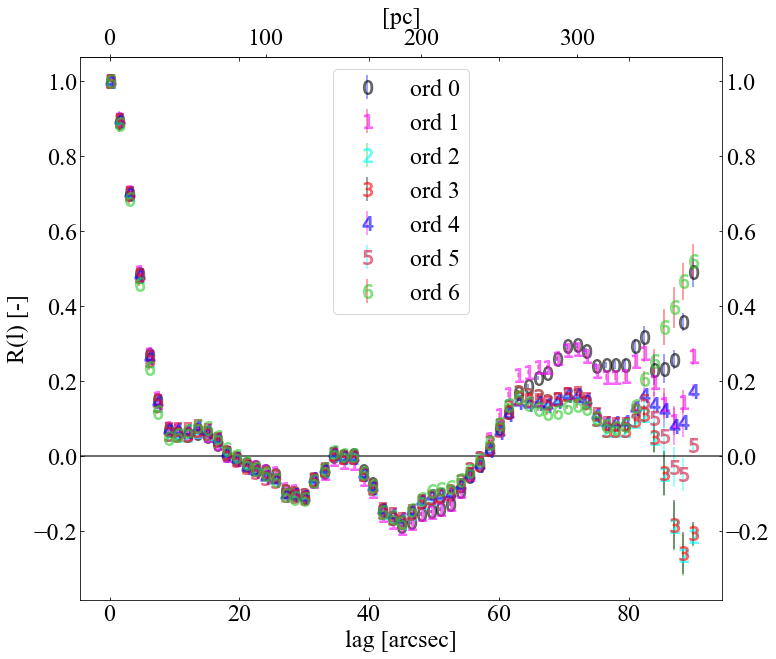

In [41]:
datax=AF
#dt=SFwh1Pr

marker=itertools.cycle((r"$0$",r"$1$",r"$2$",r"$3$",r"$4$",r"$5$",r"$6$"))
color=itertools.cycle(("black","blue","magenta","crimson","cyan","limegreen","red"))

#mx=datax[0].iloc[:,1].max()*1.25
#mn=datax[0].iloc[1,1]*0.6

fig, ax=plt.subplots(figsize=(11.5,10))

for i in range(n):
    ax.errorbar(datax[i].iloc[:,0],datax[i].iloc[:,1], yerr=datax[i].iloc[:,2],  
                marker=next(marker), fmt=' ',color=next(color), ecolor=next(color), alpha=0.5, markersize=14, label='ord ' + str(i))

#for i in range(n):
#    ax.errorbar(dt[i][0],dt[i][1],  fmt='-',color=next(color))

#ax.set(xscale='log',yscale='log')
ax.set(xlabel='lag [arcsec]', ylabel='R(l) [-]')
#plt.title('Función de estructura, $S_{2}(l)$')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='best')
#ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.grid(which='minor')
#plt.ylim(mn,mx)
#########################################################
plt.axhline(y=0, color='k', linestyle='-', alpha=0.75)
#plt.axvline(x=datax[0].iloc[xf-1,0], color='k', linestyle='-.', alpha=0.75)

def forward(x):
    return pc*x


def inverse(x):
    return pc*x

secax = ax.secondary_xaxis('top', functions=(forward, inverse))
secax.set_xlabel('[pc]')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]=tl

plt.savefig(rg+datat+'//'+'AC.pdf')

In [42]:
#os.mkdir(rg+datat)

In [43]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 14.34326982498169 seconds ---
